# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [1]:
!pip install prophet

Installing the yfinance package, which provides financial market data from Yahoo Finance

In [2]:

!pip install yfinance --upgrade --no-cache-dir

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is ABR. (or any other on the list ex.  '^GSPC'. '^GSPC' is the S & P 500 Ticker Symbol)

To view
[Ticker Symbols list](https://stockanalysis.com/stocks/)

In [3]:
# import libraries
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import matplotlib.pyplot as plt

import yfinance as yf

from datetime import timedelta



In [4]:
# stock='^GSPC'

In [4]:
stock='ABR'

In [5]:
start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Most historic Stock Prices
df.head()

Price          Close Dividends      High       Low      Open Stock Splits  \
Ticker           ABR       ABR       ABR       ABR       ABR          ABR   
Date                                                                        
2004-04-07  3.699244       0.0  3.717290  3.618041  3.618041          0.0   
2004-04-08  3.686613       0.0  3.699244  3.673981  3.699244          0.0   
2004-04-12  3.522401       0.0  3.690221  3.504356  3.690221          0.0   
2004-04-13  3.520597       0.0  3.527815  3.491725  3.520597          0.0   
2004-04-14  3.506161       0.0  3.515183  3.500747  3.500747          0.0   

Price        Volume  
Ticker          ABR  
Date                 
2004-04-07  3707500  
2004-04-08   301200  
2004-04-12   852900  
2004-04-13   226800  
2004-04-14   143900

In [7]:
# Most recent stock prices
df.tail()


Price       Close Dividends   High    Low   Open Stock Splits   Volume
Ticker        ABR       ABR    ABR    ABR    ABR          ABR      ABR
Date                                                                  
2025-03-10  12.32       0.0  12.73  12.08  12.10          0.0  6886300
2025-03-11  12.05       0.0  12.39  11.86  12.37          0.0  4910600
2025-03-12  12.26       0.0  12.32  12.06  12.11          0.0  4102300
2025-03-13  12.06       0.0  12.35  12.04  12.30          0.0  2704700
2025-03-14  12.41       0.0  12.47  12.19  12.20          0.0  3441200

View Closing values only

In [8]:
df = df.loc[:, ['Close']]

In [9]:
# Most historic Stock closing Prices
df.head()

Price          Close
Ticker           ABR
Date                
2004-04-07  3.699244
2004-04-08  3.686613
2004-04-12  3.522401
2004-04-13  3.520597
2004-04-14  3.506161

In [10]:
# Most recent stock closing prices
df.tail()


Price       Close
Ticker        ABR
Date             
2025-03-10  12.32
2025-03-11  12.05
2025-03-12  12.26
2025-03-13  12.06
2025-03-14  12.41

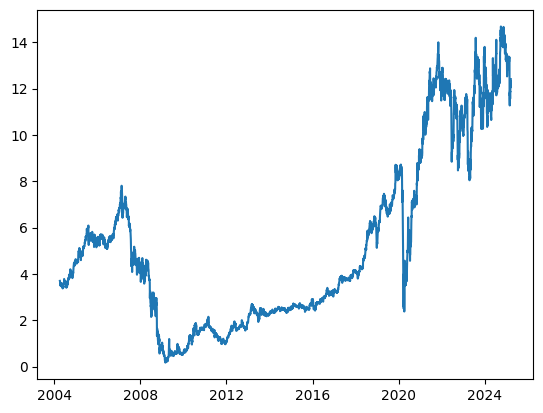

In [11]:
plt.plot(df['Close'])

 In Facebook's Prophet forecasting library, the DataFrame you pass to the model must have two columns: "ds" and "y". The "ds" (datestamp) column should contain the dates, typically in 'YYYY-MM-DD' format for daily data or datetime format for sub-daily data. The "y" column must contain the numerical values we want to forecast or model.

So if you are working with a DataFrame that has a "Date" column and you want to use it with Prophet, you would need to rename it to "ds"

In [12]:
print(df.columns)

# Flatten the MultiIndex and convert it into regular columns
df.columns = df.columns.get_level_values(0)  # Get only the first level of the MultiIndex

# Ensure that the date column is in the DataFrame (if it's in the index, move it to a column)
df['Date'] = df.index

# Rename the columns for Prophet: 'Date' to 'ds' and 'Close' (or whichever column you need) to 'y'
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

# Check the final structure of the DataFrame
df.head()

MultiIndex([('Close', 'ABR')],
           names=['Price', 'Ticker'])


Price              y         ds
Date                           
2004-04-07  3.699244 2004-04-07
2004-04-08  3.686613 2004-04-08
2004-04-12  3.522401 2004-04-12
2004-04-13  3.520597 2004-04-13
2004-04-14  3.506161 2004-04-14

In [13]:
# #date is the index so you need to make it a column
# df["Date"] = df.index
# df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


In [14]:
df.tail()

Price           y         ds
Date                        
2025-03-10  12.32 2025-03-10
2025-03-11  12.05 2025-03-11
2025-03-12  12.26 2025-03-12
2025-03-13  12.06 2025-03-13
2025-03-14  12.41 2025-03-14

# Make Stock Predictions using Facebook's Prophet

In [15]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8zfx6u1/_xvny473.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8zfx6u1/7qt5jxbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61567', 'data', 'file=/tmp/tmpb8zfx6u1/_xvny473.json', 'init=/tmp/tmpb8zfx6u1/7qt5jxbo.json', 'output', 'file=/tmp/tmpb8zfx6u1/prophet_modeloxbfk7pg/prophet_model-20250317052422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:24:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:

future = model.make_future_dataframe(periods=151)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
5414 2025-08-08  13.194711   12.181552   14.254983
5415 2025-08-09  13.249718   12.064317   14.258382
5416 2025-08-10  13.249464   12.236047   14.341084
5417 2025-08-11  13.196043   12.145323   14.166797
5418 2025-08-12  13.196392   12.198773   14.306753

In [17]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small


In [18]:
plot_components_plotly(model, forecast)


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



# Deploy on Gradio

In [19]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [20]:
import gradio as gr
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

def predict_stock(stock_ticker, start_date, end_date, periods):
    df = yf.download(stock_ticker, start=start_date, end=end_date, auto_adjust=True, actions='inline', progress=False)
    df = df.loc[:, ['Close']]
    df["Date"] = df.index
    df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

    model = Prophet()
    model.fit(df)

    future = model.make_future_dataframe(periods=int(periods))
    forecast = model.predict(future)

    fig = plot_plotly(model, forecast)
    return fig

with gr.Blocks() as demo:
    stock_ticker = gr.Textbox(label="Stock Ticker Symbol")
    start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", value=(datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d'))
    end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", value=datetime.now().strftime('%Y-%m-%d'))
    periods = gr.Number(label="Number of Days to Predict", value=30)

    outputs = gr.Plot()

    submit_button = gr.Button("Predict")
    submit_button.click(predict_stock, inputs=[stock_ticker, start_date, end_date, periods], outputs=outputs)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f09f2e873f7b5a39a9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Deploy on Huggingface Spaces - Public Deployment

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)

In [21]:
!gradio deploy


Need 'write' access token to create a Spaces repo.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

Enter your token (input will not be visible): ^C


#Interview Readiness Questions
1. Choose a new Ticker Symbol.  What is your ticker symbol?
2. What were the future price predictions
3. What were the initial price predictions

# References
[HuggingFace](www.huggingface.co)

[Gradio](https://www.gradio.app/guides/quickstart)


1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV

3. [Sample Streamlit Deployment - Prophet](https://prophet.streamlit.app/?ref=streamlit-io-gallery-favorites)


# **ANSWERS**

1. The Ticker that am choosing is: **AAPL**
(Apple Inc.)

In [22]:
stock_2 ='AAPL'

In [23]:
start = '1900-01-01'

today = pd.to_datetime("today")

yesterday = pd.to_datetime("today") - timedelta(days = 1)

end = yesterday

df_aapl = yf.download(stock_2,
                 start=start,
                 end=yesterday,
                 auto_adjust=True,
                 actions='inline',
                 progress=True)

[*********************100%***********************]  1 of 1 completed


In [24]:
df_aapl.head()

Price          Close Dividends      High       Low      Open Stock Splits  \
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL         AAPL   
Date                                                                        
1980-12-12  0.098726       0.0  0.099155  0.098726  0.098726          0.0   
1980-12-15  0.093575       0.0  0.094005  0.093575  0.094005          0.0   
1980-12-16  0.086707       0.0  0.087136  0.086707  0.087136          0.0   
1980-12-17  0.088853       0.0  0.089282  0.088853  0.088853          0.0   
1980-12-18  0.091429       0.0  0.091858  0.091429  0.091429          0.0   

Price          Volume  
Ticker           AAPL  
Date                   
1980-12-12  469033600  
1980-12-15  175884800  
1980-12-16  105728000  
1980-12-17   86441600  
1980-12-18   73449600

In [25]:
df_aapl.tail()

Price            Close Dividends        High         Low        Open  \
Ticker            AAPL      AAPL        AAPL        AAPL        AAPL   
Date                                                                   
2025-03-10  227.479996       0.0  236.160004  224.220001  235.539993   
2025-03-11  220.839996       0.0  225.839996  217.449997  223.809998   
2025-03-12  216.979996       0.0  221.750000  214.910004  220.139999   
2025-03-13  209.679993       0.0  216.839996  208.419998  215.949997   
2025-03-14  213.490005       0.0  213.949997  209.580002  211.250000   

Price      Stock Splits    Volume  
Ticker             AAPL      AAPL  
Date                               
2025-03-10          0.0  72071200  
2025-03-11          0.0  76137400  
2025-03-12          0.0  62547500  
2025-03-13          0.0  61368300  
2025-03-14          0.0  60060200

In [26]:
df_aapl = df_aapl.loc[:, ['Close']]

In [10]:
df_aapl.head()

Price          Close
Ticker          AAPL
Date                
1980-12-12  0.098726
1980-12-15  0.093575
1980-12-16  0.086707
1980-12-17  0.088853
1980-12-18  0.091429

In [27]:
df_aapl.tail()

Price            Close
Ticker            AAPL
Date                  
2025-03-10  227.479996
2025-03-11  220.839996
2025-03-12  216.979996
2025-03-13  209.679993
2025-03-14  213.490005

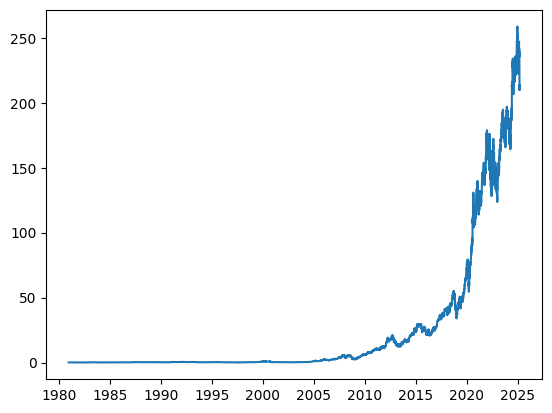

In [28]:
plt.plot(df_aapl['Close'])

In [29]:
print(df_aapl.columns)

df_aapl.columns = df_aapl.columns.get_level_values(0)

df_aapl['Date'] = df_aapl.index

df_aapl = df_aapl.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

df_aapl.head()

MultiIndex([('Close', 'AAPL')],
           names=['Price', 'Ticker'])


Price              y         ds
Date                           
1980-12-12  0.098726 1980-12-12
1980-12-15  0.093575 1980-12-15
1980-12-16  0.086707 1980-12-16
1980-12-17  0.088853 1980-12-17
1980-12-18  0.091429 1980-12-18

In [30]:
df_aapl.tail()

Price                y         ds
Date                             
2025-03-10  227.479996 2025-03-10
2025-03-11  220.839996 2025-03-11
2025-03-12  216.979996 2025-03-12
2025-03-13  209.679993 2025-03-13
2025-03-14  213.490005 2025-03-14

In [31]:
model_aapl = Prophet()

model_aapl.fit(df_aapl)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8zfx6u1/jx1q3tt3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8zfx6u1/ms4prfty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96423', 'data', 'file=/tmp/tmpb8zfx6u1/jx1q3tt3.json', 'init=/tmp/tmpb8zfx6u1/ms4prfty.json', 'output', 'file=/tmp/tmpb8zfx6u1/prophet_model2s8pwp5g/prophet_model-20250317052629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
future_aapl = model_aapl.make_future_dataframe(periods=151)

forecast_aapl = model_aapl.predict(future_aapl)

forecast_aapl[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
11300 2025-08-08  226.279215  216.568234  237.050857
11301 2025-08-09  226.407254  216.417453  236.621357
11302 2025-08-10  226.506433  216.243087  236.271316
11303 2025-08-11  226.634380  216.036090  237.526757
11304 2025-08-12  226.751622  216.952510  236.920264

In [33]:
forecast_aapl[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds      yhat  yhat_lower  yhat_upper
0 1980-12-12  1.019300   -9.809394   12.002765
1 1980-12-15  1.097105   -9.261613   12.136554
2 1980-12-16  1.106296  -10.186996   12.026641
3 1980-12-17  1.082618   -8.495625   11.542495
4 1980-12-18  1.050134   -9.592328   11.012810

In [34]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_aapl, forecast_aapl)

In [35]:
plot_components_plotly(model_aapl, forecast_aapl)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

